# Python Tips and Tricks  
**David Johnson**  
12.08.2022 - MBP Retreat  

In [1]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
sys.path.append(str(Path('../').resolve()))

In [2]:
from pprint import pprint

import numpy as np

In [3]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Bad Habits and Best Practices

### Bad Habits

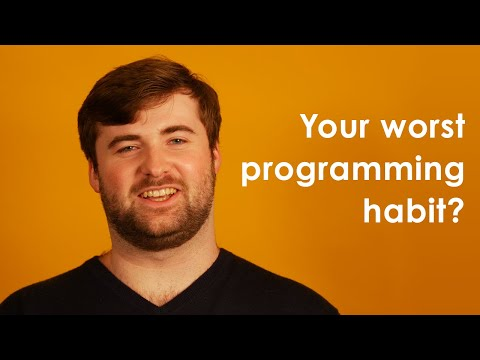

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('t1TOfEfmNU0')

### Software Engineer for Machine Learing 

<div>
    <a href="https://se-ml.github.io/practices/">
        <img src="https://se-ml.github.io/assets/img/SE4ML-practices-diagram.png" alt="SE-ML Diagram" style="width: 600px;"/>
    </a>
</div> 

## Quick Tips

### F Strings
Added to Python in version 3.6.  F strings help simply string building with variables.

In [5]:
name = 'John'
age = 21
height = 2.1234

# previous method using string format
print('{}\'s age={:d} and he is {:.2f} meters tall.'.format(name, age, height))

# Cleaner and easier to read with f strings
print(f'{name}\'s {age=} and he is {height:.2f} meters tall.')   # age= is from python 3.8 only

# multi line strings are easy too
print(f'{name}\'s {age=} and '
      f'he is {height:.2f} meters tall.')

# supports expressions within brackets too
print(f'{name}\'s age={age+10} and he is {height:.2f} meters tall.')   # age= is from python 3.8 only

John's age=21 and he is 2.12 meters tall.
John's age=21 and he is 2.12 meters tall.
John's age=21 and he is 2.12 meters tall.
John's age=31 and he is 2.12 meters tall.


### Pathlib Path

Introduced in Python 3.4, but still not many people seem to use it. 
It makes dealing with file paths much easier than previous methods using the `os` module, and automatically handles different seperators for different OS's

In [6]:
from pathlib import Path

In [7]:
working_path = Path('/Users/djohnson/projects/Notebooks/')
assets_folder = 'assets'
imgs_folder = 'images'

imgs_path = working_path / assets_folder / imgs_folder
imgs_path

PosixPath('/Users/djohnson/projects/Notebooks/assets/images')

In [8]:
# find all png files in a directory using recurisive glob method
# returns a generator

img_files = imgs_path.rglob('*.png')

for f in img_files:
    print(f)

/Users/djohnson/projects/Notebooks/assets/images/melscale.png
/Users/djohnson/projects/Notebooks/assets/images/dft.png
/Users/djohnson/projects/Notebooks/assets/images/mfcc.png
/Users/djohnson/projects/Notebooks/assets/images/STFT_Viz2.png
/Users/djohnson/projects/Notebooks/assets/images/subimages/hann.png


In [9]:
# Be careful this returns a generator
pprint(list(img_files))

[]


In [10]:
# so if you need to use the filepaths more than once save to a list first
img_files = list(imgs_path.rglob('*.png'))

In [11]:
for f in img_files:
    print(f)
    
print()
pprint(img_files)

/Users/djohnson/projects/Notebooks/assets/images/melscale.png
/Users/djohnson/projects/Notebooks/assets/images/dft.png
/Users/djohnson/projects/Notebooks/assets/images/mfcc.png
/Users/djohnson/projects/Notebooks/assets/images/STFT_Viz2.png
/Users/djohnson/projects/Notebooks/assets/images/subimages/hann.png

[PosixPath('/Users/djohnson/projects/Notebooks/assets/images/melscale.png'),
 PosixPath('/Users/djohnson/projects/Notebooks/assets/images/dft.png'),
 PosixPath('/Users/djohnson/projects/Notebooks/assets/images/mfcc.png'),
 PosixPath('/Users/djohnson/projects/Notebooks/assets/images/STFT_Viz2.png'),
 PosixPath('/Users/djohnson/projects/Notebooks/assets/images/subimages/hann.png')]


### Underscores in variable names

- `_var` = private variable or method (intended for internal use
- `__var` = python changes name to avoid name conflicts between parent classes
- `var_` = used to avoid naming conflicts


- `__func__` = magic methods

Single underscore

- used to indicate variable is insignificant or unused
- `x, _ = func_with_two_return_values()`
- `for _ in range(10):`


### Some Things to Avoid

In [ ]:
# don't do this, many naming conflicts and loading of modules and resources that are not needed
from module import *

#instead
import module 
import module as md

from module import ModClass, mod_function

### List and Dict Comprehensions

In [13]:
list1 = list(range(0, 22, 3))
list1

[0, 3, 6, 9, 12, 15, 18, 21]

In [14]:
# basic list comprension
doubled = [x*2 for x in list1]
doubled

[0, 6, 12, 18, 24, 30, 36, 42]

In [15]:
# filtering
evenlist = [x for x in list1 if x % 2 == 0]
evenlist

[0, 6, 12, 18]

In [16]:
oddlist = [x for x in list1 if x % 2 != 0]
oddlist

[3, 9, 15, 21]

In [17]:
# nested 
productlist = [(x, y)for x in oddlist for y in evenlist]
productlist

[(3, 0),
 (3, 6),
 (3, 12),
 (3, 18),
 (9, 0),
 (9, 6),
 (9, 12),
 (9, 18),
 (15, 0),
 (15, 6),
 (15, 12),
 (15, 18),
 (21, 0),
 (21, 6),
 (21, 12),
 (21, 18)]

In [18]:
# dictionary comprehension
evenodd_dict = {e: o for e, o in zip(evenlist, oddlist)}
evenodd_dict

{0: 3, 6: 9, 12: 15, 18: 21}

In [19]:
# swapping a dict
oddeven_dict = {v: k for k, v in evenodd_dict.items()}
oddeven_dict

{3: 0, 9: 6, 15: 12, 21: 18}

### Functors
A function object, or an obect that is used like a function (ie an object that is directly callable)

In [20]:
# Normal Class
class Adder:
    def __init__(self, n):
        self._n = n
        
    def add(self, x):
        return self._n + x

In [21]:
add3 = Adder(3)
add3.add(15)

18

In [22]:
# Callable Class
class AdderCallable:
    def __init__(self, n):
        self._n = n
        
    def __call__(self, *args, **kwargs):
        # magic function to make class callable
        return self.add(*args, **kwargs)
        
    def add(self, x):
        return self._n + x

In [23]:
add4 = AdderCallable(4)
add4(15)

19

### Lambdas

In [27]:
def power(x, y):
    return x**y

In [28]:
power = lambda x, y: x**y

In [29]:
power(2, 3)

8

In [30]:
[power(2, x) for x in range(12)]

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [31]:
t = [(30, 'b'), (20, 'c'), (40, 'a'), (10, 'd')]
sorted(t)

[(10, 'd'), (20, 'c'), (30, 'b'), (40, 'a')]

In [32]:
sorted(t, key=lambda x: x[1])

[(40, 'a'), (30, 'b'), (20, 'c'), (10, 'd')]

### Map, Filter and Reduce

In [33]:
list1

[0, 3, 6, 9, 12, 15, 18, 21]

In [34]:
# Map
doubles = map(lambda x: x*2, list1)
doubles

In [35]:
list(doubles)

[0, 6, 12, 18, 24, 30, 36, 42]

In [36]:
# Filter
evens = filter(lambda x: x % 2 == 0, list1)
list(evens)

[0, 6, 12, 18]

In [37]:
# Reduce
from functools import reduce

summed = reduce(lambda x, y: x+y, list1)
summed

84

### Python itertools module
[itertools Documentation](https://docs.python.org/3/library/itertools.html#module-itertools)

In [38]:
import itertools

In [39]:
gridspace =  dict(
    n_layers = [2, 3, 4],
    n_units = [64, 128, 256],
    dropout = [0.10, 0.25, 0.35],
    lr = [0.00025, 0.00075, 0.001, 0.005]
)

In [40]:
x = [v for v in gridspace.values()]
x

[[2, 3, 4],
 [64, 128, 256],
 [0.1, 0.25, 0.35],
 [0.00025, 0.00075, 0.001, 0.005]]

In [44]:
combinations = list(itertools.product(*x))
combinations

[(2, 64, 0.1, 0.00025),
 (2, 64, 0.1, 0.00075),
 (2, 64, 0.1, 0.001),
 (2, 64, 0.1, 0.005),
 (2, 64, 0.25, 0.00025),
 (2, 64, 0.25, 0.00075),
 (2, 64, 0.25, 0.001),
 (2, 64, 0.25, 0.005),
 (2, 64, 0.35, 0.00025),
 (2, 64, 0.35, 0.00075),
 (2, 64, 0.35, 0.001),
 (2, 64, 0.35, 0.005),
 (2, 128, 0.1, 0.00025),
 (2, 128, 0.1, 0.00075),
 (2, 128, 0.1, 0.001),
 (2, 128, 0.1, 0.005),
 (2, 128, 0.25, 0.00025),
 (2, 128, 0.25, 0.00075),
 (2, 128, 0.25, 0.001),
 (2, 128, 0.25, 0.005),
 (2, 128, 0.35, 0.00025),
 (2, 128, 0.35, 0.00075),
 (2, 128, 0.35, 0.001),
 (2, 128, 0.35, 0.005),
 (2, 256, 0.1, 0.00025),
 (2, 256, 0.1, 0.00075),
 (2, 256, 0.1, 0.001),
 (2, 256, 0.1, 0.005),
 (2, 256, 0.25, 0.00025),
 (2, 256, 0.25, 0.00075),
 (2, 256, 0.25, 0.001),
 (2, 256, 0.25, 0.005),
 (2, 256, 0.35, 0.00025),
 (2, 256, 0.35, 0.00075),
 (2, 256, 0.35, 0.001),
 (2, 256, 0.35, 0.005),
 (3, 64, 0.1, 0.00025),
 (3, 64, 0.1, 0.00075),
 (3, 64, 0.1, 0.001),
 (3, 64, 0.1, 0.005),
 (3, 64, 0.25, 0.00025),
 (3, 64

In [45]:
grid = [{key: value[j] for j, key in enumerate(gridspace)} for value in combinations]
grid

[{'n_layers': 2, 'n_units': 64, 'dropout': 0.1, 'lr': 0.00025},
 {'n_layers': 2, 'n_units': 64, 'dropout': 0.1, 'lr': 0.00075},
 {'n_layers': 2, 'n_units': 64, 'dropout': 0.1, 'lr': 0.001},
 {'n_layers': 2, 'n_units': 64, 'dropout': 0.1, 'lr': 0.005},
 {'n_layers': 2, 'n_units': 64, 'dropout': 0.25, 'lr': 0.00025},
 {'n_layers': 2, 'n_units': 64, 'dropout': 0.25, 'lr': 0.00075},
 {'n_layers': 2, 'n_units': 64, 'dropout': 0.25, 'lr': 0.001},
 {'n_layers': 2, 'n_units': 64, 'dropout': 0.25, 'lr': 0.005},
 {'n_layers': 2, 'n_units': 64, 'dropout': 0.35, 'lr': 0.00025},
 {'n_layers': 2, 'n_units': 64, 'dropout': 0.35, 'lr': 0.00075},
 {'n_layers': 2, 'n_units': 64, 'dropout': 0.35, 'lr': 0.001},
 {'n_layers': 2, 'n_units': 64, 'dropout': 0.35, 'lr': 0.005},
 {'n_layers': 2, 'n_units': 128, 'dropout': 0.1, 'lr': 0.00025},
 {'n_layers': 2, 'n_units': 128, 'dropout': 0.1, 'lr': 0.00075},
 {'n_layers': 2, 'n_units': 128, 'dropout': 0.1, 'lr': 0.001},
 {'n_layers': 2, 'n_units': 128, 'dropout':

In [46]:
def generate_combinations(gridspace):
    x = [gridspace[cname] for cname in gridspace]
    combinations = list(itertools.product(*x))
    return [{key: value[j] for j, key in enumerate(gridspace)} for value in combinations]

In [47]:
# permutations
list(itertools.permutations([3, 5, 6]))

[(3, 5, 6), (3, 6, 5), (5, 3, 6), (5, 6, 3), (6, 3, 5), (6, 5, 3)]

### Accessing a Dict Element

In [48]:
grid = generate_combinations(gridspace)
config1 = grid[0]
# config1['weight_decay'] = 0.0099
pprint(config1)

{'dropout': 0.1, 'lr': 0.00025, 'n_layers': 2, 'n_units': 64}


In [49]:
weight_decay = config1['weight_decay']

KeyError: 'weight_decay'

In [50]:
#
if 'weight_decay' in config1:
    weight_decay = config1['weight_decay']
else:
    weight_decay = 0.001
    
try:
    weight_decay2 = config1['weight_decay']
except KeyError as e:
    weight_decay2 = 0.001

weight_decay3 = config1.get('weight_decay', 0.001)

print(f'{weight_decay=}, {weight_decay2=}, {weight_decay3=}')

weight_decay=0.001, weight_decay2=0.001, weight_decay3=0.001


### Walrus Operator (or assignment expression operator)

Python 3.8 and later

- assigns and returns the value on the right side of the operator

In [51]:
a = 5

In [52]:
(b := 10)

10

In [53]:
print(a)
print(b)

5
10


In [54]:
power(walrus := 3, 4)

81

In [55]:
walrus

3

### TQDM Progress Bar

Library for nice progress bars

`pip install tqdm`

In [56]:
import time 

from tqdm.notebook import tqdm, trange

In [57]:
for idx in tqdm(range(1, 1001)):
    time.sleep(0.01)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [58]:
pbar = tqdm(range(1, 1001), desc='Count:')
for idx in pbar:
    pbar.set_description(f'Count: {idx}')
    time.sleep(0.01)

Count::   0%|          | 0/1000 [00:00<?, ?it/s]

In [59]:
int_list = np.arange(1, 1001)

with tqdm(int_list) as pbar:
    for idx in pbar:
        pbar.set_description(f'Count: {idx}')
        time.sleep(0.01) 

  0%|          | 0/1000 [00:00<?, ?it/s]

In [60]:
with trange(1, 1001) as pbar:
    for idx in pbar:
        pbar.set_description(f'Count: {idx}')
        time.sleep(0.01) 

  0%|          | 0/1000 [00:00<?, ?it/s]

In [61]:
def some_generator(min, max):
    for i in range(min, max):
        yield i
        
with tqdm(some_generator(1, 1001)) as pbar:
    for idx in pbar:
        pbar.set_description(f'Count: {idx}')
        time.sleep(0.01) 

0it [00:00, ?it/s]

In [62]:
with tqdm(some_generator(1, 1001), total=1000) as pbar:
    for idx in pbar:
        pbar.set_description(f'Count: {idx}')
        time.sleep(0.01) 

  0%|          | 0/1000 [00:00<?, ?it/s]

### Speeding Up Pandas

[Modin for pandas](https://modin.readthedocs.io/en/stable/)  
`pip install modin`

[Swifter for pandas](https://github.com/jmcarpenter2/swifter)  
Implement an parallel `apply`  
`pip install swifter`

In [ ]:
# modin
import modin.pandas as pd

In [ ]:
import pandas as pd
import swifter

In [ ]:
# runs on single core
df['x2'] = df['x'].apply(lambda x: x**2)
# runs on multiple cores
df['x2'] = df['x'].swifter.apply(lambda x: x**2)

### Assert Statements

- Used to verify, debug and test code.
- Can be used as *sanity checks* on your code
- Used for unit testing


In [64]:
def load_data():
    X = np.random.rand(10, 5, 1)
    Y = np.random.randint(0, 3, (10, 1))
    return X, Y

In [65]:
X, Y = load_data()

In [66]:
assert len(X) == len(Y), f'Features and labels have different lengths. {len(X)=} | {len(Y)=}'